### Global warming stripes

In [1]:
import matplotlib

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap


%matplotlib inline

Following https://matplotlib.org/matplotblog/posts/warming-stripes/

In [2]:
FIRST = 1850
LAST = 2018  # inclusive

# Reference period for the center of the color scale
FIRST_REFERENCE = 1971
LAST_REFERENCE = 2000
LIM = 0.7 # degrees

In [3]:
df = pd.read_fwf(
    'HadCRUT.4.6.0.0.annual_ns_avg.txt',
    index_col=0,
    usecols=(0, 1),
    names=['year', 'anomaly'],
    header=None,
)

anomaly = df.loc[FIRST:LAST, 'anomaly'].dropna()
reference = anomaly.loc[FIRST_REFERENCE:LAST_REFERENCE].mean()

In [4]:
# the colors in this colormap come from http://colorbrewer2.org
# the 8 more saturated colors from the 9 blues / 9 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

(1850, 2019)

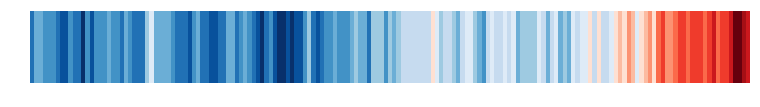

In [5]:
fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

# create a collection with a rectangle for each year
col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(FIRST, LAST + 1)
])

# set data, colormap and color limits
col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(FIRST, LAST + 1)

In [6]:
fig.savefig('warming-stripes.png')